In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [3]:
adata = sc.read_loom("./data/WT/Arch1_18hpf.loom")

In [4]:
adata

AnnData object with n_obs × n_vars = 420 × 18597
    obs: 'ClusterID', 'ClusterName', 'David_new_clusters', 'G1_early_score1', 'G1_pigment_score1', 'G1_skeletal_score1', 'G2M_Score', 'New_Early_NC_Score1', 'New_Neural_Glial_Score1', 'New_Pigment_Score1', 'New_Skeletal_Score1', 'Phase', 'RNA_snn_res_0_5', 'RNA_snn_res_0_6', 'RNA_snn_res_0_8', 'RNA_snn_res_1', 'RNA_snn_res_1_2', 'S_Score', 'TF_clusters', 'cluster0_assignment', 'cluster1_assignment', 'cluster2_assignment', 'cluster3_assignment', 'early_NC_score1', 'entropy', 'nCount_RNA', 'nFeature_RNA', 'old_seurat_clusters', 'orig_ident', 'percent_mt', 'seurat_clusters', 'soup_clusters'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    obsm: 'pca_cell_embeddings', 'tsne_cell_embeddings', 'umap_cell_embeddings'
    varm: 'pca_feature_loadings'
    layers: 'norm_data', 'scale_data'

In [5]:
adata.obsm['X_pca'] = adata.obsm['pca_cell_embeddings']

In [11]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=11)

... storing 'ClusterName' as categorical
... storing 'David_new_clusters' as categorical
... storing 'Phase' as categorical
... storing 'RNA_snn_res_0_5' as categorical
... storing 'RNA_snn_res_0_6' as categorical
... storing 'RNA_snn_res_0_8' as categorical
... storing 'RNA_snn_res_1' as categorical
... storing 'RNA_snn_res_1_2' as categorical
... storing 'TF_clusters' as categorical
... storing 'old_seurat_clusters' as categorical
... storing 'orig_ident' as categorical
... storing 'seurat_clusters' as categorical


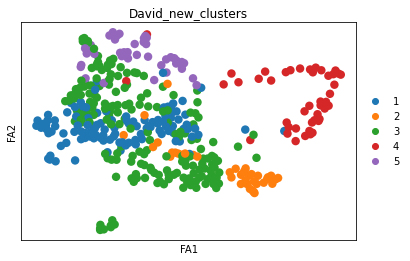

In [12]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color="David_new_clusters")

# RNA velocyto

In [8]:
adata_18hpf = sc.read_10x_mtx("./data/18hpf/")
ldata_18hpf = scv.read("./data/18hpf/18hpf_Arch1.loom", cache=True)
adata_18hpf = scv.utils.merge(adata_18hpf, ldata_18hpf)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [9]:
adata_18hpf = adata_18hpf[adata.obs_names,:]

In [13]:
adata_18hpf.obs["David_new_clusters"] = adata.obs["David_new_clusters"]
adata_18hpf.obsm["X_draw_graph_fa"] = adata.obsm["X_draw_graph_fa"]

In [14]:
scv.pp.filter_and_normalize(adata_18hpf)

Normalized count data: X, spliced, unspliced.


In [15]:
scv.pp.moments(adata_18hpf)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [16]:
scv.tl.velocity(adata_18hpf, mode='stochastic')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [17]:
scv.tl.velocity_graph(adata_18hpf)

computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [18]:
adata_18hpf.obsm['umap_cell_embeddings'] = adata.obsm['umap_cell_embeddings']

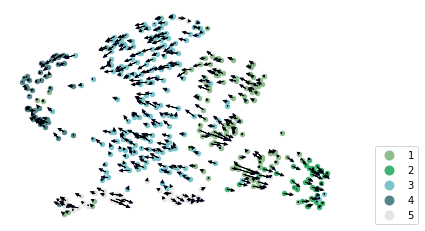

In [20]:
x_paga = adata.obsm['umap_cell_embeddings']
colormap_celltype = {1:"#8FBC8F", 2:"#3CB371", 3:"#7AC5CD", 4:"#53868b", 5:"#e5e5e5"}
ax = scv.pl.velocity_embedding(adata_18hpf, basis='umap_cell_embeddings', scale=0.25, linewidth=0.8, arrow_size=1.8, color='b', palette="Set3", size=100, alpha=0.0, show=False)
david_id = np.array( adata.obs['David_new_clusters'],int )
for ctype in [1,2,3,4,5]:
    tmp_idx = np.where(david_id == ctype)[0]
    ax.scatter(x_paga[tmp_idx,0], x_paga[tmp_idx,1], c=colormap_celltype[ctype], label=ctype, s=20)
plt.axis("off")
plt.legend(loc=[1.1,0.0], markerscale=2)
plt.savefig("./figures/scvelo_umap_embedding_davidcluster.png", bbox_inches="tight", dpi=600)